<a href="https://colab.research.google.com/github/belikeamitesh/CS306-Machine-Learning/blob/main/Stock_Monitoring_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Name** - Amitesh Kumar
## **Roll Number** - 1901023
## **Mini Project Topic** - ML-based approaches in stock monitoring

- **Abstract:** The data set of performances of weighted scoring stock portfolios are obtained with mixture design from the US stock market historical database.

- **Objective:** the performance(Return,Risks) of the portfolio that needs to be optimized as the forms: Maximize performance, or Minimize performance. The output of UCI Stock Portfolio Performance Dataset is Continous , so it falls under Regression


**Details of Dataset:**
There are 6 inputs and 6 outputs

*   Input values are stock picking concepts which is [' Large B/P ',' Large ROE',' Large S/P',' Large Return Rate in the last quarter ',' Large Market Value ',' Small systematic Risk']
*   Output values are performance metrics of stocks which is ['Annual Return','Excess Return','Systematic Risk','Total Risk','Abs. Win Rate','Rel. Win Rate']


- All the output values are normalised
- There are in total 63 combinations of weights(Patterns) and 6 Features
- Data is divided into different periods(time frames) of 5 quarters.

Now Firstly lets analyze the data ,and know what we are going to do and why.

# Data Analysis of the Given Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from statistics import mean

### Importing Datasets

In [ ]:
sheets=pd.read_excel('/content/drive/MyDrive/stock.xlsx',sheet_name=['all period'], usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
sheets1=pd.read_excel('/content/drive/MyDrive/stock.xlsx',sheet_name=['1st period'], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
sheets2=pd.read_excel('/content/drive/MyDrive/stock.xlsx',sheet_name=['2nd period'], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
sheets3=pd.read_excel('/content/drive/MyDrive/stock.xlsx',sheet_name=['3rd period'], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
sheets4=pd.read_excel('/content/drive/MyDrive/stock.xlsx',sheet_name=['4th period'], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
df=pd.concat(sheets[frame] for frame in sheets.keys())
df1=pd.concat(sheets1[frame] for frame in sheets1.keys())
df2=pd.concat(sheets2[frame] for frame in sheets2.keys())
df3=pd.concat(sheets3[frame] for frame in sheets3.keys())
df4=pd.concat(sheets4[frame] for frame in sheets4.keys())
# df4

## The below plots show the distribution of the target variables in the whole dataset

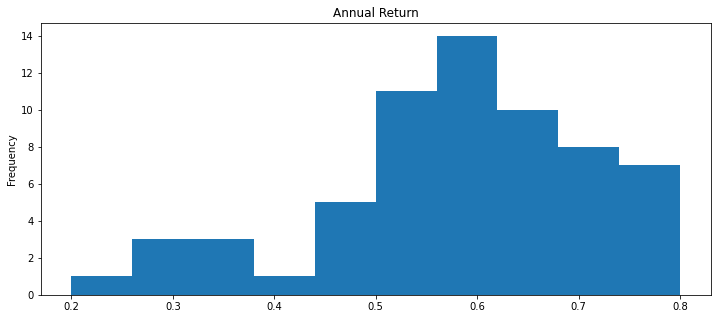

In [ ]:
df['Annual Return.1'].plot(kind='hist',figsize=(12,5),title='Annual Return')

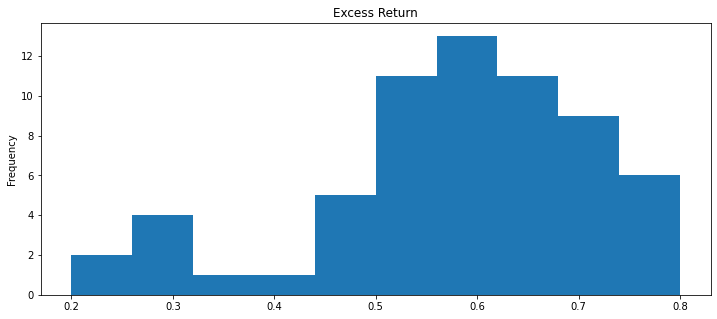

In [ ]:
df['Excess Return.1'].plot(kind='hist',figsize=(12,5),title='Excess Return')

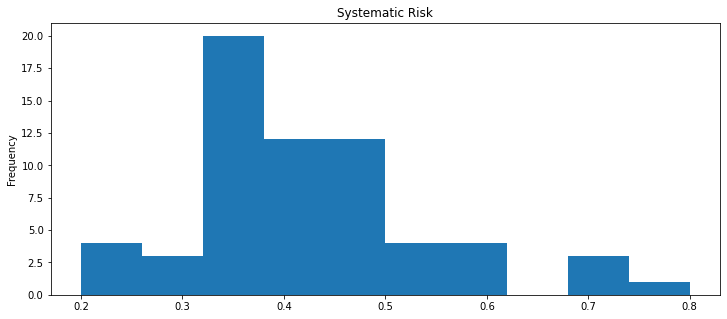

In [ ]:
df['Systematic Risk.1'].plot(kind='hist',figsize=(12,5),title='Systematic Risk')


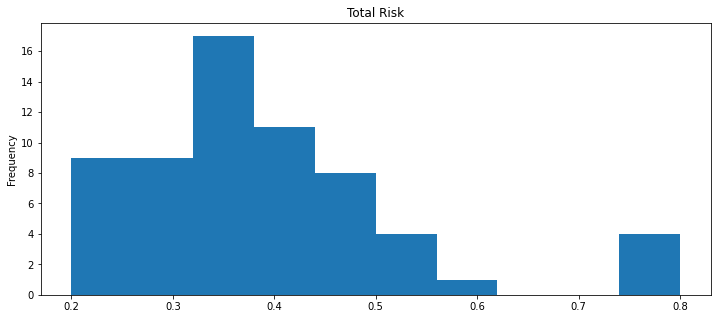

In [ ]:
df['Total Risk.1'].plot(kind='hist',figsize=(12,5),title='Total Risk')

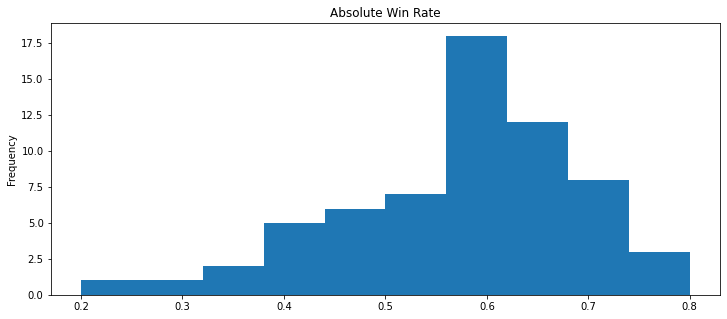

In [ ]:
df['Abs. Win Rate.1'].plot(kind='hist',figsize=(12,5),title='Absolute Win Rate')

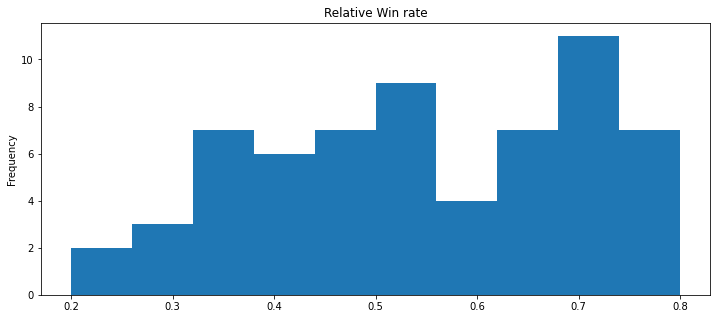

In [ ]:
df['Rel. Win Rate.1'].plot(kind='hist',figsize=(12,5),title='Relative Win rate')

## Change in average of targets over each period:

- The below plots shows how the average of each target variable changes over
each period
- From the below plots we can observe that the average of Total risk is
increasing for every period.

Text(0, 0.5, 'Rel. Win Rate')

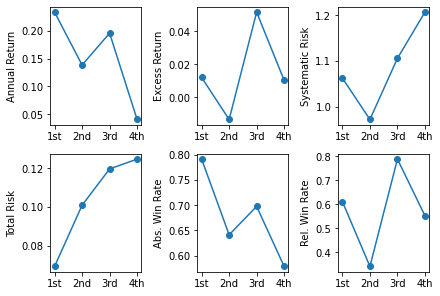

In [ ]:
fig, axs = plt.subplots(2, 3,constrained_layout=True)
axs[0,0].plot( ["1st", "2nd", "3rd", "4th"],[np.mean(df1['Annual Return']),np.mean(df2['Annual Return']),np.mean(df3['Annual Return']),np.mean(df4['Annual Return'])], 'o-')
axs[0,0].set_ylabel("Annual Return")
axs[0,1].plot( ["1st", "2nd", "3rd", "4th"],[np.mean(df1['Excess Return']),np.mean(df2['Excess Return']),np.mean(df3['Excess Return']),np.mean(df4['Excess Return'])], 'o-')
axs[0,1].set_ylabel("Excess Return")
axs[0,2].plot( ["1st", "2nd", "3rd", "4th"],[np.mean(df1['Systematic Risk']),np.mean(df2['Systematic Risk']),np.mean(df3['Systematic Risk']),np.mean(df4['Systematic Risk'])], 'o-')
axs[0,2].set_ylabel("Systematic Risk")
axs[1,0].plot( ["1st", "2nd", "3rd", "4th"],[np.mean(df1['Total Risk']),np.mean(df2['Total Risk']),np.mean(df3['Total Risk']),np.mean(df4['Total Risk'])], 'o-')
axs[1,0].set_ylabel("Total Risk")
axs[1,1].plot( ["1st", "2nd", "3rd", "4th"],[np.mean(df1['Abs. Win Rate']),np.mean(df2['Abs. Win Rate']),np.mean(df3['Abs. Win Rate']),np.mean(df4['Abs. Win Rate'])], 'o-')
axs[1,1].set_ylabel("Abs. Win Rate")
axs[1,2].plot( ["1st", "2nd", "3rd", "4th"],[np.mean(df1['Rel. Win Rate']),np.mean(df2['Rel. Win Rate']),np.mean(df3['Rel. Win Rate']),np.mean(df4['Rel. Win Rate'])], 'o-')
axs[1,2].set_ylabel("Rel. Win Rate")


## Training and Testing of all-period Dataset with Linear Regression Model to check if we can use linear regression



model for Annual Return.1 evaluation parameter
The linear model is: Y = -9.7828 + 10.473*large b/p + 10.568*large ROE + 10.659*large s/p+ 10.228*large return rates+ 10.115*large market sales+ 10.131*small system risk
Variance score: 0.36117972516245067


model for Excess Return.1 evaluation parameter
The linear model is: Y = -8.873 + 9.5727*large b/p + 9.6447*large ROE + 9.7116*large s/p+ 9.2828*large return rates+ 9.1945*large market sales+ 9.2824*small system risk
Variance score: -0.1520645600270878


model for Systematic Risk.1 evaluation parameter
The linear model is: Y = -3.2868 + 3.7433*large b/p + 3.6227*large ROE + 3.8197*large s/p+ 3.8822*large return rates+ 3.6616*large market sales+ 3.5723*small system risk
Variance score: 0.4934691471957926


model for Total Risk.1 evaluation parameter
The linear model is: Y = -4.4489 + 5.0137*large b/p + 4.6773*large ROE + 5.0407*large s/p+ 4.9974*large return rates+ 4.5803*large market sales+ 4.7592*small system risk
Variance score: 0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




model for Rel. Win Rate.1 evaluation parameter
The linear model is: Y = -53.719 + 54.211*large b/p + 54.724*large ROE + 54.329*large s/p+ 54.075*large return rates+ 54.278*large market sales+ 54.044*small system risk
Variance score: 0.3087448015226909


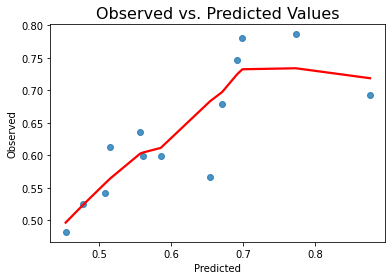

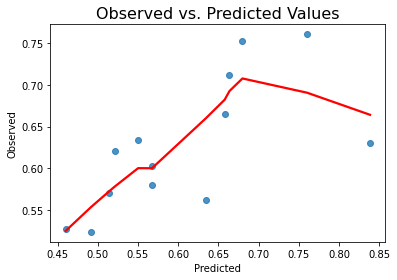

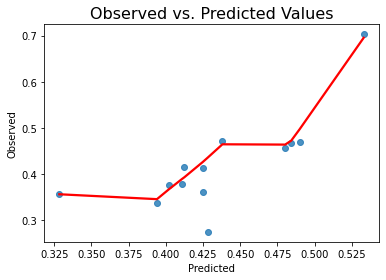

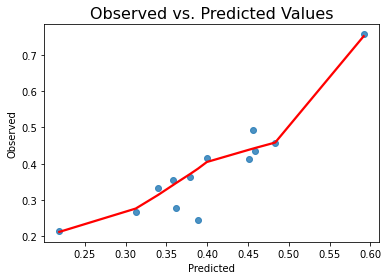

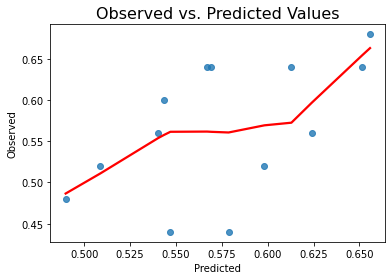

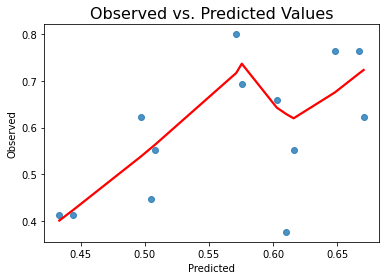

In [ ]:
X= df.drop(['Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'],axis=1)
Y = df.drop([" Large B/P "," Large ROE "," Large S/P "," Large Return Rate in the last quarter "," Large Market Value "," Small systematic Risk"],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=1)
targets=pd.DataFrame(columns=['Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'],index=y_test.index.values) 
ans=[]
for y in targets.keys():
    reg = LinearRegression() 
    reg.fit(x_train, y_train[y])
    ans.append(reg)
    print("\n")
    print("model for",y,'evaluation parameter')
    print("The linear model is: Y = {:.5} + {:.5}*large b/p + {:.5}*large ROE + {:.5}*large s/p+ {:.5}*large return rates+ {:.5}*large market sales+ {:.5}*small system risk".format(reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2],reg.coef_[3],reg.coef_[4],reg.coef_[5]))
    print('Variance score: {}'.format(reg.score(x_test, y_test[y]))) 
    y_pred = reg.predict(x_test)
    targets[y]= y_pred          
    fig, ax = plt.subplots(1,1)
    sns.regplot(x=y_pred, y=y_test[y], lowess=True, ax=ax, line_kws={'color': 'red'})
    ax.set_title('Observed vs. Predicted Values', fontsize=16)
    ax.set(xlabel='Predicted', ylabel='Observed')

## Linearity (Which we assumed in our dataset)

- linear regression needs the relationship between the independent and
dependent variables to be linear.

dependent variable against each independent variable as shown below.
- By observing below graphs we can say that each independent
variable is not dependent on any particular feature as such linearly so we cannot use univariate linear regression, we need to use multivariate linear regression.

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


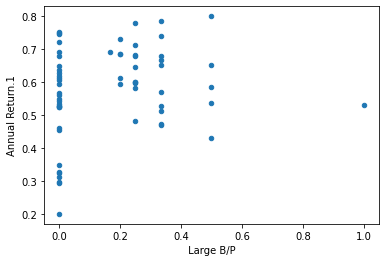

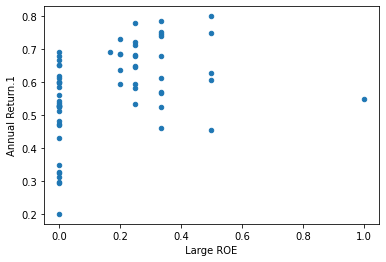

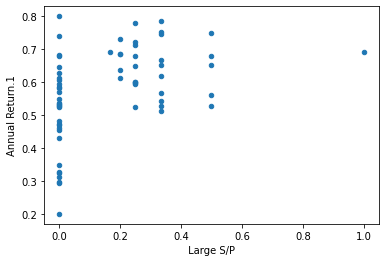

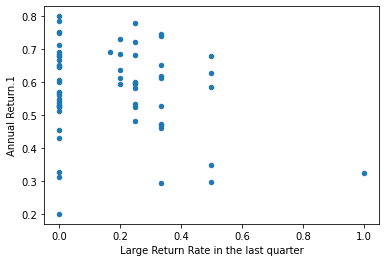

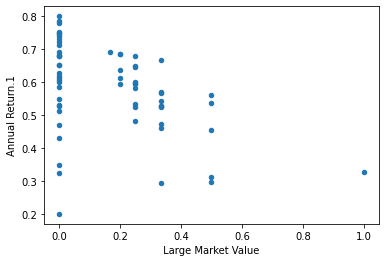

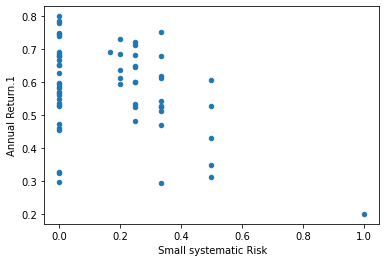

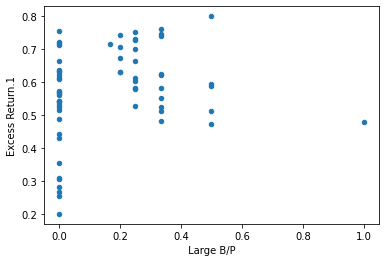

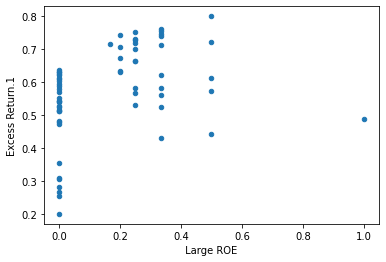

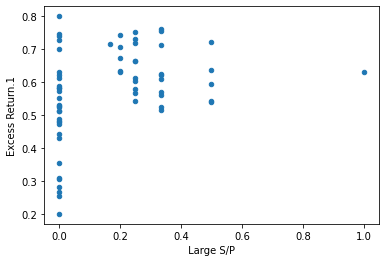

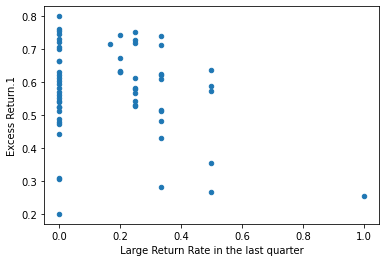

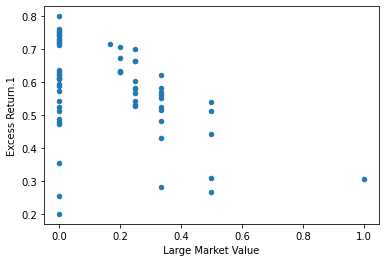

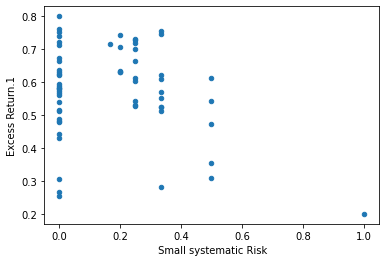

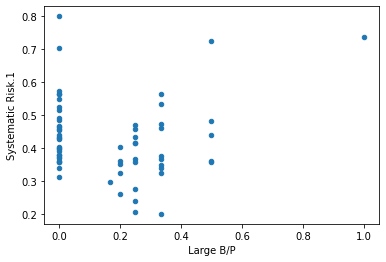

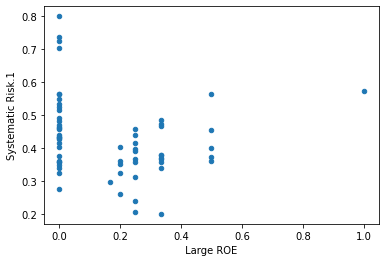

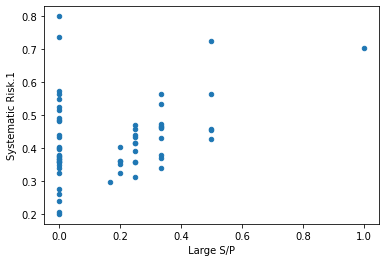

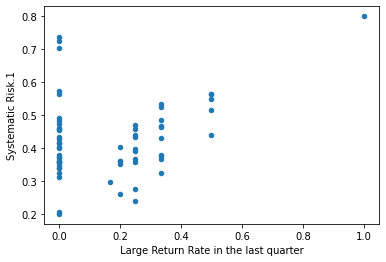

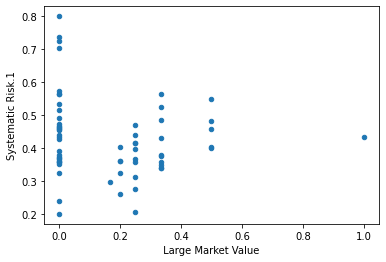

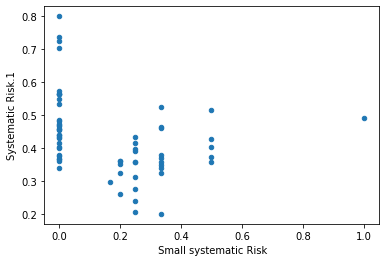

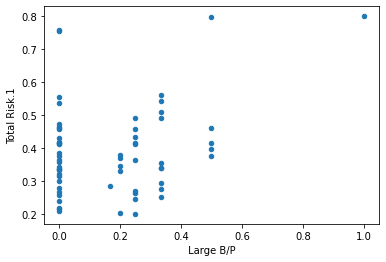

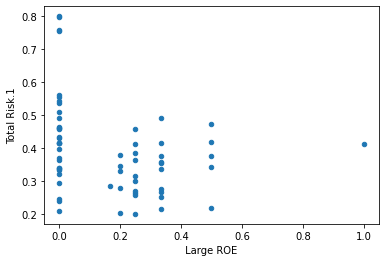

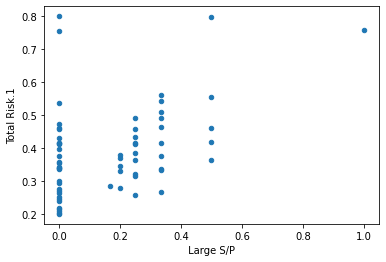

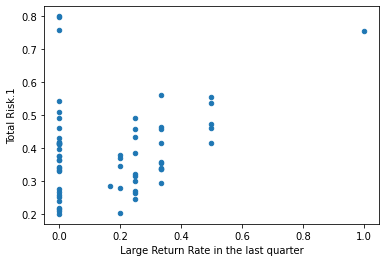

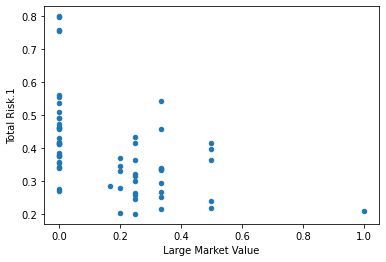

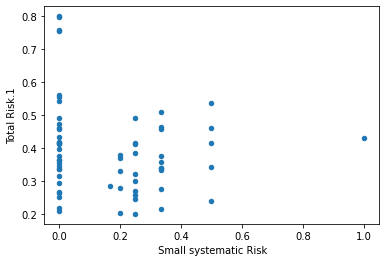

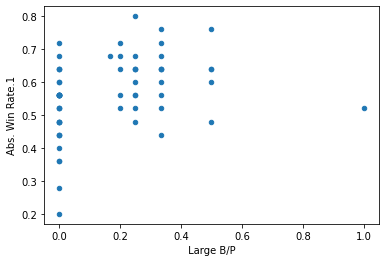

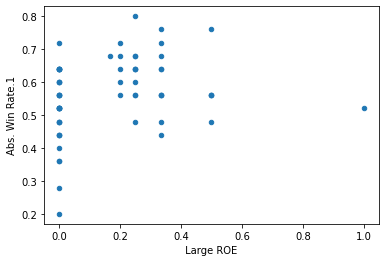

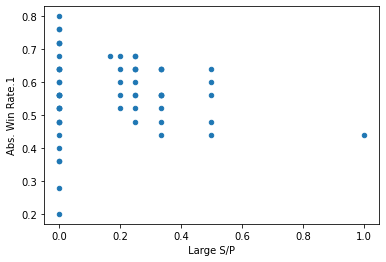

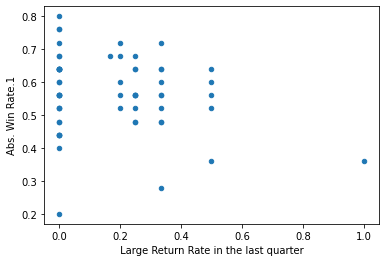

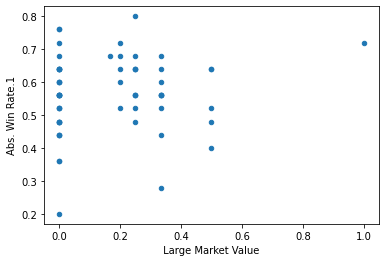

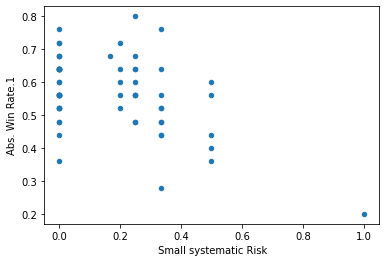

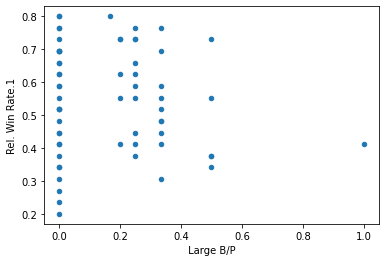

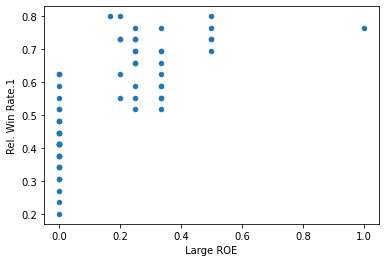

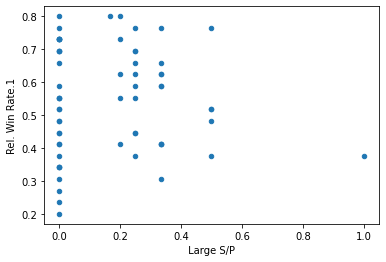

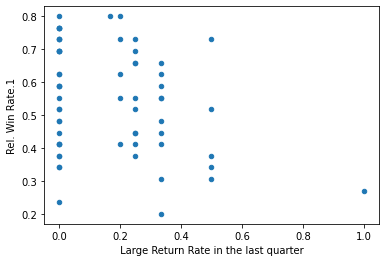

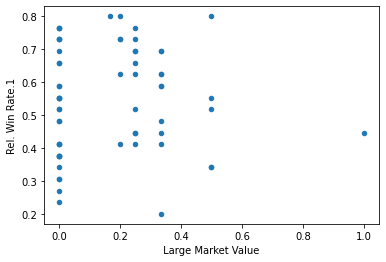

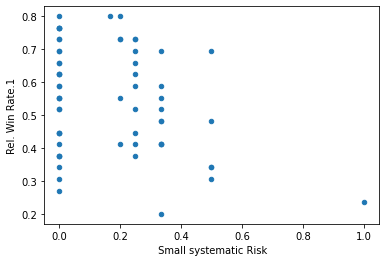

In [ ]:
for y in targets.keys():
    for x in X.keys():
        colors = (0,0,0)
        area = np.pi*3
        df.plot.scatter(x=x, y=y)

# Final Analysis with Results for each period


## Period 1
In this dataset I have used K fold cross validation and tested it by training and testing the dataset accordingly fold by fold.

### Dataset Description

In [ ]:
#period 1 dataset
dataset_period1 = pd.read_excel("/content/drive/MyDrive/stock.xlsx",sheet_name=3)
dataset_period1.drop(dataset_period1.columns[[7,8,9,10,11,12]],axis=1,inplace=True)
dataset_period1.head()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.624791,0.713672,0.381541,0.688242,0.56,0.500
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.599280,0.430547,0.737417,0.633989,0.68,0.725
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.517916,0.590403,0.442649,0.776619,0.56,0.200
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.396296,0.320119,0.681552,0.787637,0.32,0.500
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.219079,0.350509,0.380716,0.200000,0.56,0.275


In [ ]:
dataset_period1.fillna(method ='ffill', inplace = True)
x=dataset_period1.iloc[:,1:7]
y=dataset_period1.iloc[:,7:13]
dataset_1 = dataset_period1.drop(['Annual Return.1', 'Excess Return.1', 'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'], axis = 1)
dataset_1

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
0,1,1.000,0.000,0.000,0.000,0.000,0.000
1,2,0.000,1.000,0.000,0.000,0.000,0.000
2,3,0.000,0.000,1.000,0.000,0.000,0.000
3,4,0.000,0.000,0.000,1.000,0.000,0.000
4,5,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200
59,60,0.200,0.200,0.000,0.200,0.200,0.200
60,61,0.200,0.000,0.200,0.200,0.200,0.200
61,62,0.000,0.200,0.200,0.200,0.200,0.200


In [ ]:
# input with 6 features
x = np.array(dataset_1)
# min max scalling the dataset
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

As this is a regression task, we'll use multiple regression models. Simple Linear Regression is an evident choice.

For all the six outputs, We will now train out model and Test it to see How this works

### K-fold Corss validation
It ensures that every observation from the original dataset has the chance of appearing in training and test set.

In [ ]:
# using k fold cross validation function
def kfoldvalidation(features,y_actual):
  kf = KFold(n_splits=5,random_state=1000, shuffle=True)
  kf.get_n_splits(features)
  # print(kf)
  x_train_set = []
  x_test_set = []
  all_y_train = []
  all_y_test = []
  for train_index, test_index in kf.split(features):
    # print("Train index : "+str(train_index)+" Test Index : "+str(test_index))
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y_actual[train_index], y_actual[test_index]
    x_train_set.append(X_train)
    x_test_set.append(X_test)
    all_y_train.append(y_train)
    all_y_test.append(y_test)
  x_train_set, x_test_set, all_y_train, all_y_test  = np.array(x_train_set), np.array(x_test_set), np.array(all_y_train), np.array(all_y_test)
  return x_train_set, x_test_set, all_y_train, all_y_test

# y = np.array(dataset_period1['Annual Return.1']) 
# # splitting data into training and testing datasets
# x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)

### Annual Return

In [ ]:
y = np.array(dataset_period1['Annual Return.1']) 
# splitting data into training and testing datasets
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_ar=[]
test_loss_ar=[]
y_predict=[]
ans1=[]
for i in range(0, 5):
  # performing linear regression and training data for every fold
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  ans1.append(clf)
  y_predict_test = clf.predict(x_test_set[i])
  y_predict.append(y_predict_test)
  y_predict_train = clf.predict(x_train_set[i])
  # collecting errors for every fold for training and testing
  train_loss_ar.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_ar.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))
# mean of MSEs
Train_MSE_annual_return= mean(train_mse)
Test_MSE_annual_return= mean(test_mse)
# standard deviation of MSEs
tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)
# plt.plot(y_predict)
# plt.plot(x_test_set)
# plt.show()

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.005917952598605769+-0.0005773948641171405

Tesing Mean Squared Error : 0.009277774836007575+-0.0033167469785340127

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Excess Return

In [ ]:
y = np.array(dataset_period1['Excess Return.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_er=[]
test_loss_er=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_er.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_er.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_excess_return= mean(train_mse)
Test_MSE_excess_return= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.005917952598605769+-0.0006472650179413363

Tesing Mean Squared Error : 0.009277774836007575+-0.004328201919497702

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Systematic Risk

In [ ]:
y = np.array(dataset_period1['Systematic Risk.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_sr=[]
test_loss_sr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_sr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_sr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_systematic_risk= mean(train_mse)
Test_MSE_systematic_risk= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.005917952598605769+-0.0008278030727882827

Tesing Mean Squared Error : 0.009277774836007575+-0.00574323972666502

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Total Risk

In [ ]:
y = np.array(dataset_period1['Total Risk.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_tr=[]
test_loss_tr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_tr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_tr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_total_risk= mean(train_mse)
Test_MSE_total_risk= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.005917952598605769+-0.0010194223562580403

Tesing Mean Squared Error : 0.009277774836007575+-0.00703566134715562

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Absolute Win Rate

In [ ]:
y = np.array(dataset_period1['Abs. Win Rate.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_awr=[]
test_loss_awr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_awr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_awr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_abs_wr= mean(train_mse)
Test_MSE_abs_wr= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



*************************************************************************
Training Mean Squared Error : 0.005917952598605769+-0.0011108149169564586

Tesing Mean Squared Error : 0.009277774836007575+-0.0062438570854356544

*************************************************************************


### Relative Win Rate

In [ ]:
y = np.array(dataset_period1['Rel. Win Rate.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_rwr=[]
test_loss_rwr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_rwr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_rwr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_rel_wr= mean(train_mse)
Test_MSE_rel_wr= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.005917952598605769+-0.0009665983211875421

Tesing Mean Squared Error : 0.009277774836007575+-0.004444062401875612

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Graph analysis of MSE of training and testing data based on all outputs

Text(0.5, 1.0, 'Relative Win Rate')

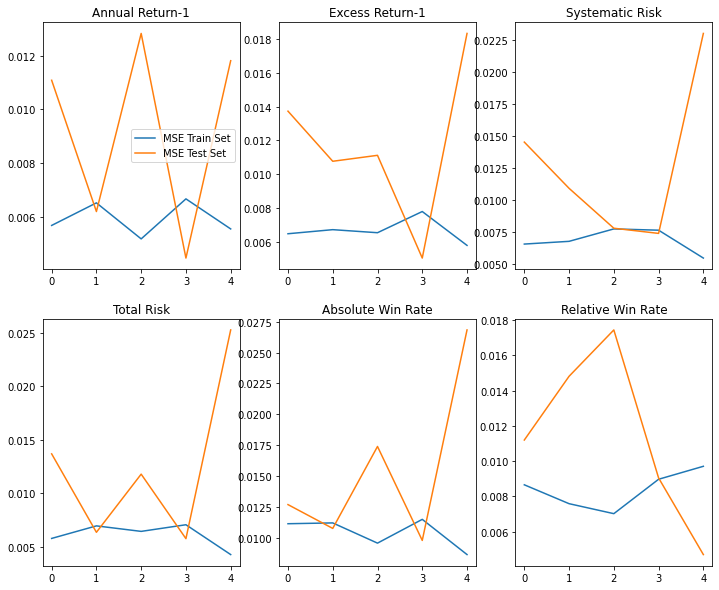

In [ ]:
figure,axis=plt.subplots(2,3,figsize=(12,10))
axis[0,0].plot(train_loss_ar,label='MSE Train Set')
axis[0,0].plot(test_loss_ar,label='MSE Test Set')
axis[0,0].set_title('Annual Return-1')
axis[0,0].legend()

axis[0,1].plot(train_loss_er)
axis[0,1].plot(test_loss_er)
axis[0,1].set_title('Excess Return-1')
  
axis[0,2].plot(train_loss_sr)
axis[0,2].plot(test_loss_sr)
axis[0,2].set_title('Systematic Risk')

axis[1,0].plot(train_loss_tr)
axis[1,0].plot(test_loss_tr)
axis[1,0].set_title('Total Risk')

axis[1,1].plot(train_loss_awr)
axis[1,1].plot(test_loss_awr)
axis[1,1].set_title('Absolute Win Rate')

axis[1,2].plot(train_loss_rwr)
axis[1,2].plot(test_loss_rwr)
axis[1,2].set_title('Relative Win Rate')

In [ ]:
# from matplotlib import pyplot
# print(ans[0])
# bars=('Large B/P ', ' Large ROE ', ' Large S/P ',
#        ' LRR in last 1/4 ', ' Large Market Value ',
#        ' Small systematic Risk')
# x_pos = np.arange(len(bars))
# # plot feature importance
# plt.figure(1,figsize=(20, 12))
# plt.subplot(2,3, 1)
# plt.title("Important Features for predicting Anuual Return")
# plt.xticks(x_pos,bars,rotation=15)
# pyplot.bar([x for x in range(len(ans1[4].coef_))], ans1[4].coef_)

Linear regression gave a very good result when compared in accordance with Mean Squared error on training and test set. Now using Gradient descent process for linear regression on other period to check changes.

## Period 2

In this dataset I have used Stochastic Gradient Descent and tune hyperparameters to check our best results

### Dataset Description

In [ ]:
# dataset = dataset.drop(['ID'], axis=1)
dataset_period2 = pd.read_excel("/content/drive/MyDrive/stock.xlsx",sheet_name=2)
dataset_period2.drop(dataset_period2.columns[[7,8,9,10,11,12]],axis=1,inplace=True)
dataset_period2.head()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.227755,0.507540,0.244336,0.316609,0.371429,0.4
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.589132,0.481622,0.587008,0.367016,0.542857,0.6
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.310197,0.325059,0.491529,0.425910,0.285714,0.4
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.732604,0.490854,0.800000,0.800000,0.542857,0.6
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.632961,0.634952,0.466010,0.200000,0.800000,0.3


In [ ]:
dataset_period2.fillna(method ='ffill', inplace = True)
x=dataset_period2.iloc[:,1:7]
y=dataset_period2.iloc[:,7:13]
dataset_2 = dataset_period2.drop(['Annual Return.1', 'Excess Return.1', 'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'], axis = 1)
dataset_2

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
0,1,1.000,0.000,0.000,0.000,0.000,0.000
1,2,0.000,1.000,0.000,0.000,0.000,0.000
2,3,0.000,0.000,1.000,0.000,0.000,0.000
3,4,0.000,0.000,0.000,1.000,0.000,0.000
4,5,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200
59,60,0.200,0.200,0.000,0.200,0.200,0.200
60,61,0.200,0.000,0.200,0.200,0.200,0.200
61,62,0.000,0.200,0.200,0.200,0.200,0.200


In [ ]:
# input with 6 features
x = np.array(dataset_2)
# min max scalling the dataset
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

### Annual Return

In [ ]:
y= np.array(dataset_period2['Annual Return.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.01
rho=0.0001
max_iter=500
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.011031801075861849


#### Hyperparameter tuning for Annual Return

In [ ]:
lr=0.1
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.005631977917961923


In [ ]:
lr=0.1
rho=0.0001
max_iter=500
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.008335222671223795


In [ ]:
lr=0.1
rho=0.0001
max_iter=1000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.0052004982140323305


We can see this the model performs best on the hyperparameters - 
Learning rate : 0.1
RHO : 0.0001
Max Iteration : 2000

#### Testing Anuual Return
Now that we have our best hyper parameters we can train and test our final model with that.

In [ ]:
lr=0.1
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
print("Test MSE : ",mean_squared_error(y_test,SGDReg_1.predict(X_test)))
# print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Test MSE :  0.005914680428152862


Actual Values :  [0.34953588 0.40684596 0.26573933 0.56154324 0.48801592 0.63296135
 0.27422081 0.8        0.32066769 0.2        0.46854515 0.73002133
 0.51702962]
Predicted Values :  [0.46455633 0.5582362  0.22695972 0.57568918 0.49822378 0.6252797
 0.3634754  0.73881352 0.40619205 0.32337932 0.53049811 0.71201411
 0.49545438]


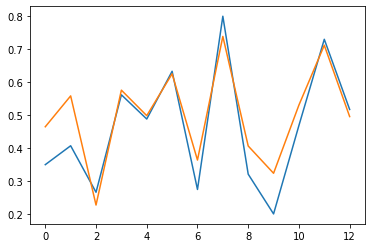

In [ ]:
print("Actual Values : ",y_test)
print("Predicted Values : ",SGDReg_1.predict(X_test))
plt.plot(y_test,label="Actual Values")
plt.plot(SGDReg_1.predict(X_test),label="Predicted Values")
plt.show()

### Excess Return

In [ ]:
y = np.array(dataset_period2['Excess Return.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.01
rho=0.0001
max_iter=500
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.007561700124191334


#### Hyperparameter tuning for Excess Return

In [ ]:
lr=0.1
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.006310762355944353


In [ ]:
lr=0.1
rho=0.0001
max_iter=1000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.00627619561597185


In [ ]:
lr=0.001
rho=0.0001
max_iter=1000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.010026247369508617


We can see this the model performs best on the hyperparameters - 
Learning rate : 0.1
RHO : 0.0001
Max Iteration : 1000

#### Testing Excess Return
Now that we have our best hyper parameters we can train and test our final model with that.

In [ ]:
lr=0.1
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
print("Test MSE : ",mean_squared_error(y_test,SGDReg_1.predict(X_test)))
# print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Test MSE :  0.008277903981418474


Actual Values :  [0.47272545 0.51166395 0.76502021 0.49560824 0.3338104  0.46216346
 0.50753961 0.5856879  0.69999487 0.55002976 0.63204484 0.5584432
 0.73950255]
Predicted Values :  [0.55236767 0.46087808 0.60600886 0.53534807 0.47149519 0.53985382
 0.58969009 0.60776377 0.57977781 0.55654665 0.53457863 0.5873204
 0.6179719 ]


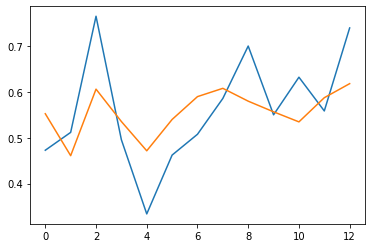

In [ ]:
print("Actual Values : ",y_test)
print("Predicted Values : ",SGDReg_1.predict(X_test))
plt.plot(y_test,label="Actual Values")
plt.plot(SGDReg_1.predict(X_test),label="Predicted Values")
plt.show()

### Systematic Risk

In [ ]:
y = np.array(dataset_period2['Systematic Risk.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.01
rho=0.0001
max_iter=500
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.008737133558810888


#### Hyperparameter tuning for Systematic Risk

In [ ]:
lr=0.1
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.005820244333598405


In [ ]:
lr=0.1
rho=0.0001
max_iter=1000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.005961965384828175


In [ ]:
lr=0.01
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.008656116441594922


We can see this the model performs best on the hyperparameters - 
Learning rate : 0.1
RHO : 0.0001
Max Iteration : 1000

#### Testing Systematic Risk
Now that we have our best hyper parameters we can train and test our final model with that.

In [ ]:
lr=0.1
rho=0.0001
max_iter=1000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
print("Test MSE : ",mean_squared_error(y_test,SGDReg_1.predict(X_test)))
# print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Test MSE :  0.013159757953182864


Actual Values :  [0.52889534 0.38346821 0.36972046 0.42417058 0.48264577 0.28190195
 0.46601025 0.4301259  0.24433624 0.55818054 0.4960369  0.57061806
 0.25176978]
Predicted Values :  [ 0.46458621  0.32119035  0.34955674  0.49785728  0.4994887   0.29827667
  0.55280374  0.20523421 -0.04927366  0.53870548  0.5696148   0.50630718
  0.20247973]


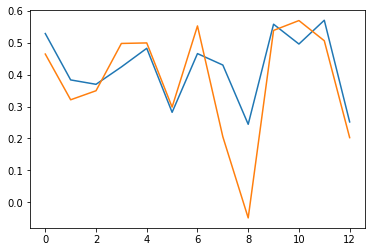

In [ ]:
print("Actual Values : ",y_test)
print("Predicted Values : ",SGDReg_1.predict(X_test))
plt.plot(y_test,label="Actual Values")
plt.plot(SGDReg_1.predict(X_test),label="Predicted Values")
plt.show()

### Total Risk

In [ ]:
y = np.array(dataset_period2['Total Risk.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.01
rho=0.0001
max_iter=500
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.004574052949955819


#### Hyperparameter tuning for Total Risk

In [ ]:
lr=0.1
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.0037653393490101874


In [ ]:
lr=0.001
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.005944941204444185


In [ ]:
lr=0.1
rho=0.001
max_iter=1000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.003909325320571534


We can see this the model performs best on the hyperparameters - 
Learning rate : 0.1
RHO : 0.0001
Max Iteration : 1000

#### Testing Total Risk
Now that we have our best hyper parameters we can train and test our final model with that.

In [ ]:
lr=0.001
rho=0.0001
max_iter=1000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
print("Train MSE : ",mean_squared_error(y_test,SGDReg_1.predict(X_test)))
# print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Train MSE :  0.017842800533961735


Actual Values :  [0.3144158  0.25976519 0.65900504 0.21565701 0.35618256 0.20459761
 0.45894767 0.32557154 0.59769937 0.36396868 0.36115058 0.28953071
 0.38713832]
Predicted Values :  [0.3195519  0.29242165 0.31569727 0.30257271 0.34484162 0.3125951
 0.33733339 0.32760768 0.33612638 0.32907334 0.30524538 0.3318853
 0.32152318]


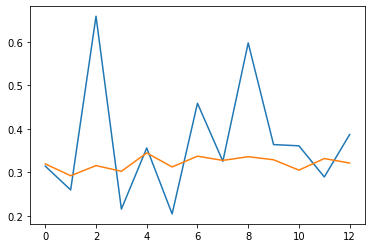

In [ ]:
print("Actual Values : ",y_test)
print("Predicted Values : ",SGDReg_1.predict(X_test))
plt.plot(y_test,label="Actual Values")
plt.plot(SGDReg_1.predict(X_test),label="Predicted Values")
plt.show()

In [ ]:
print("Actual Values : ",y_test)
print("Predicted Values : ",SGDReg_1.predict(X_test))

Actual Values :  [0.3144158  0.25976519 0.65900504 0.21565701 0.35618256 0.20459761
 0.45894767 0.32557154 0.59769937 0.36396868 0.36115058 0.28953071
 0.38713832]
Predicted Values :  [0.3195519  0.29242165 0.31569727 0.30257271 0.34484162 0.3125951
 0.33733339 0.32760768 0.33612638 0.32907334 0.30524538 0.3318853
 0.32152318]


### Absolute Win Rate

In [ ]:
y = np.array(dataset_period2['Abs. Win Rate.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.01
rho=0.0001
max_iter=500
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.0059803071194039405


#### Hyperparameter Tuning for Absolute Win Rate

In [ ]:
lr=0.1
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.0033957563765685417


In [ ]:
lr=0.001
rho=0.0001
max_iter=500
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.00859267947311186


In [ ]:
lr=0.001
rho=0.0001
max_iter=1000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.00859878170119861


We can see this the model performs best on the hyperparameters - 
Learning rate : 0.001
RHO : 0.0001
Max Iteration : 1000

#### Testing Absolute Win Rate
Now that we have our best hyper parameters we can train and test our final model with that.

In [ ]:
lr=0.1
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
print("Test MSE : ",mean_squared_error(y_test,SGDReg_1.predict(X_test)))
# print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Test MSE :  0.008671570112374984


Actual Values :  [0.37142857 0.2        0.45714286 0.37142857 0.45714286 0.45714286
 0.28571429 0.62857143 0.45714286 0.62857143 0.45714286 0.28571429
 0.54285714]
Predicted Values :  [0.41083594 0.35763371 0.46587227 0.40243666 0.52684129 0.38894787
 0.36029742 0.48249329 0.38919773 0.59027181 0.62250986 0.34189846
 0.43197354]


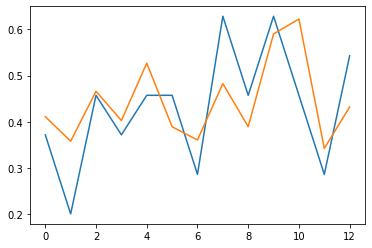

In [ ]:
print("Actual Values : ",y_test)
print("Predicted Values : ",SGDReg_1.predict(X_test))
plt.plot(y_test,label="Actual Values")
plt.plot(SGDReg_1.predict(X_test),label="Predicted Values")
plt.show()

### Relative Win Rate

In [ ]:
y = np.array(dataset_period2['Rel. Win Rate.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.01
rho=0.0001
max_iter=500
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.01635608183193636


#### Hyperparameter Tuning of Relative Win Rate

In [ ]:
lr=0.1
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.007559455156784898


In [ ]:
lr=0.01
rho=0.0001
max_iter=2000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.016232252615195418


In [ ]:
lr=0.1
rho=0.0001
max_iter=500
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.012207205941392876


In [ ]:
lr=0.1
rho=0.0001
max_iter=1000
print("Results of Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
# print("Train MSE : ",mean_squared_error(y_train,SGDReg_1.predict(X_train)))
print("Validation MSE : ",mse_1)

Results of Linear Regression : 
Validation MSE :  0.00943425948832046


We can see this the model performs best on the hyperparameters - 
Learning rate : 0.1
RHO : 0.0001
Max Iteration : 1000

#### Testing Realtive Win Rate
Now that we have our best hyper parameters we can train and test our final model with that.

In [ ]:
lr=0.1
rho=0.0001
max_iter=1000
print("Results of final Linear Regression : ")
SGDReg_1=linear_model.SGDRegressor(
    max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho
)
SGDReg_1.fit(X_train,y_train)
mse_1=(mean_squared_error(y_valid,SGDReg_1.predict(X_valid)))
print("Test MSE : ",mean_squared_error(y_test,SGDReg_1.predict(X_test)))

Results of final Linear Regression : 
Test MSE :  0.012161592607836681


Actual Values :  [0.4 0.4 0.5 0.7 0.5 0.6 0.5 0.6 0.7 0.4 0.3 0.4 0.6]
Predicted Values :  [0.31607764 0.44671974 0.52612413 0.51995852 0.46886667 0.4967894
 0.45904063 0.63399008 0.52655225 0.44541881 0.48584995 0.30078692
 0.75745623]


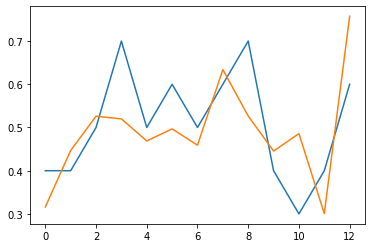

In [ ]:
print("Actual Values : ",y_test)
print("Predicted Values : ",SGDReg_1.predict(X_test))
plt.plot(y_test,label="Actual Values")
plt.plot(SGDReg_1.predict(X_test),label="Predicted Values")
plt.show()

### Graphs of Errors Per Epoch

#### Annual Return

Loss vs Epoch in Annual Return : 


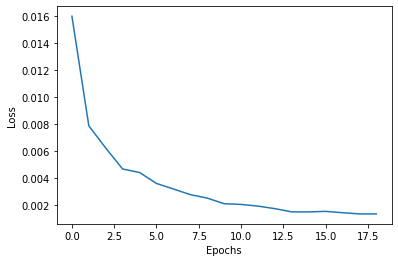

In [ ]:
from io import StringIO
import sys
y = np.array(dataset_period2['Annual Return.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.1
rho=0.0001
max_iter=2000
print("Loss vs Epoch in Annual Return : ")
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = linear_model.SGDRegressor(max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho, verbose=1)
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.close()

In [ ]:
##r2 score
print('R-squared score (test): {:.3f}'.format(clf.score(X_test, y_test)))

R-squared score (test): 0.645


#### Excess Return

Loss vs Epoch in Excess Return : 


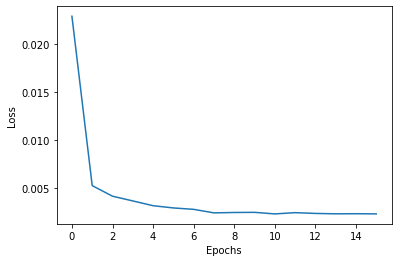

In [ ]:
from io import StringIO
import sys
y = np.array(dataset_period2['Excess Return.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.1
rho=0.0001
max_iter=1000
print("Loss vs Epoch in Excess Return : ")
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = linear_model.SGDRegressor(max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho, verbose=1)
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.close()

In [ ]:
##r2 score
print('R-squared score (test): {:.3f}'.format(clf.score(X_test, y_test)))

R-squared score (test): 0.437


#### Systematic Risk

Loss vs Epoch in Systematic Risk : 


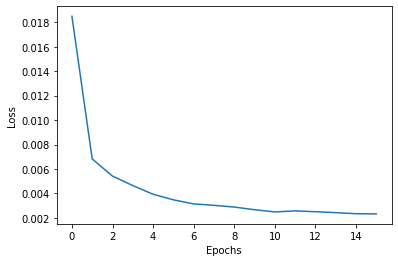

In [ ]:
from io import StringIO
import sys
y = np.array(dataset_period2['Systematic Risk.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.1
rho=0.0001
max_iter=1000
print("Loss vs Epoch in Systematic Risk : ")
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = linear_model.SGDRegressor(max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho, verbose=1)
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.close()

In [ ]:
##r2 score
print('R-squared score (test): {:.3f}'.format(clf.score(X_test, y_test)))

R-squared score (test): 0.646


#### Total Risk

Loss vs Epoch in Total Risk :


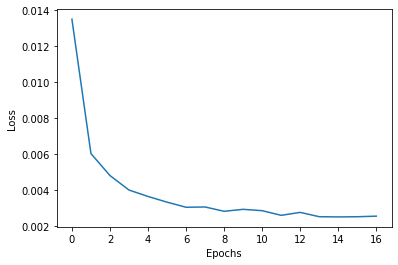

In [ ]:
from io import StringIO
import sys
y = np.array(dataset_period2['Total Risk.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
# LR=0.1 rho=0.5 epoch=10
lr=0.1
rho=0.0001
max_iter=1000
print("Loss vs Epoch in Total Risk :")
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = linear_model.SGDRegressor(max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho, verbose=1)
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.close()

In [ ]:
##r2 score
print('R-squared score (test): {:.3f}'.format(clf.score(X_test, y_test)))

R-squared score (test): -0.443


#### Absolute Win Rate

Loss vs Epoch in Absolute Win Rate :


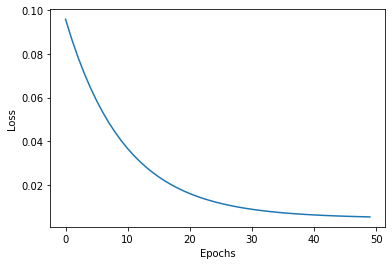

In [ ]:
from io import StringIO
import sys
y = np.array(dataset_period2['Abs. Win Rate.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
lr=0.001
rho=0.0001
max_iter=1000
print("Loss vs Epoch in Absolute Win Rate :")
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = linear_model.SGDRegressor(max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho, verbose=1)
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.close()

In [ ]:
##r2 score
print('R-squared score (test): {:.3f}'.format(clf.score(X_test, y_test)))

R-squared score (test): 0.036


#### Relative Win Rate

Loss vs Epoch in Relative win Rate :


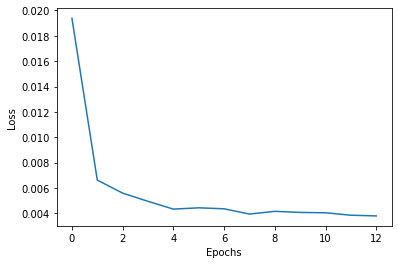

In [ ]:
from io import StringIO
import sys
y = np.array(dataset_period2['Rel. Win Rate.1'])
# train test split
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.6)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
lr=0.1
rho=0.0001
max_iter=1000
print("Loss vs Epoch in Relative win Rate :")
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = linear_model.SGDRegressor(max_iter=max_iter,
    learning_rate='constant',
    eta0=lr,
    tol=rho, verbose=1)
clf.fit(X_train, y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.close()

In [ ]:
##r2 score
print('R-squared score (test): {:.3f}'.format(clf.score(X_test, y_test)))

R-squared score (test): 0.294


## Period 3 
In this dataset I have used K kfoldvalidation cross validation and tested it by training and testing the dataset accordingly kfoldvalidation by kfoldvalidation.

### Dataset Description

In [ ]:
dataset_period3 = pd.read_excel("/content/drive/MyDrive/stock.xlsx",sheet_name=1)
dataset_period3.drop(dataset_period3.columns[[7,8,9,10,11,12]],axis=1,inplace=True)
dataset_period3.head()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.647161,0.688251,0.800000,0.800000,0.457143,0.650
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.492034,0.494779,0.488481,0.460754,0.285714,0.650
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.791489,0.800000,0.579796,0.670530,0.457143,0.725
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.218169,0.263772,0.680969,0.764019,0.200000,0.275
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.273698,0.262572,0.406379,0.333465,0.371429,0.575


In [ ]:
dataset_period3.fillna(method ='ffill', inplace = True)
x=dataset_period3.iloc[:,1:7]
y=dataset_period3.iloc[:,7:13]
dataset_3 = dataset_period3.drop(['Annual Return.1', 'Excess Return.1', 'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'], axis = 1)
dataset_3

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
0,1,1.000,0.000,0.000,0.000,0.000,0.000
1,2,0.000,1.000,0.000,0.000,0.000,0.000
2,3,0.000,0.000,1.000,0.000,0.000,0.000
3,4,0.000,0.000,0.000,1.000,0.000,0.000
4,5,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200
59,60,0.200,0.200,0.000,0.200,0.200,0.200
60,61,0.200,0.000,0.200,0.200,0.200,0.200
61,62,0.000,0.200,0.200,0.200,0.200,0.200


In [ ]:
# input with 6 features
x = np.array(dataset_3)
# min max scalling the dataset
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

### Annual Return

In [ ]:
y = np.array(dataset_period3['Annual Return.1']) 
# splitting data into training and testing datasets
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_ar=[]
test_loss_ar=[]
y_predict=[]
ans1=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  ans1.append(clf)
  y_predict_test = clf.predict(x_test_set[i])
  y_predict.append(y_predict_test)
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_ar.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_ar.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_annual_return= mean(train_mse)
Test_MSE_annual_return= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)
# plt.plot(y_predict)
# plt.plot(x_test_set)
# plt.show()

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002884121817498756+-0.0005229250755394674

Tesing Mean Squared Error : 0.005194809994238931+-0.003175209827046812

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Excess Return

In [ ]:
y = np.array(dataset_period3['Excess Return.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_er=[]
test_loss_er=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_er.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_er.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_excess_return= mean(train_mse)
Test_MSE_excess_return= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002884121817498756+-0.00034438414398880297

Tesing Mean Squared Error : 0.005194809994238931+-0.0020636031981771377

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Systematic Risk

In [ ]:
y = np.array(dataset_period3['Systematic Risk.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_sr=[]
test_loss_sr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_sr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_sr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_systematic_risk= mean(train_mse)
Test_MSE_systematic_risk= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002884121817498756+-0.0016276309468557877

Tesing Mean Squared Error : 0.005194809994238931+-0.009551701632102061

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Total Risk

In [ ]:
y = np.array(dataset_period3['Total Risk.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_tr=[]
test_loss_tr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_tr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_tr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_total_risk= mean(train_mse)
Test_MSE_total_risk= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002884121817498756+-0.0013047315341804552

Tesing Mean Squared Error : 0.005194809994238931+-0.007408736084364913

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Absolute Win Rate

In [ ]:
y = np.array(dataset_period3['Abs. Win Rate.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_awr=[]
test_loss_awr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_awr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_awr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_abs_wr= mean(train_mse)
Test_MSE_abs_wr= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)
print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002884121817498756+-0.0014680814436945535

Tesing Mean Squared Error : 0.005194809994238931+-0.009101465974554572

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Relative Win Rate

In [ ]:
y = np.array(dataset_period3['Rel. Win Rate.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_rwr=[]
test_loss_rwr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_rwr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_rwr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_rel_wr= mean(train_mse)
Test_MSE_rel_wr= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002884121817498756+-0.0010732988307690624

Tesing Mean Squared Error : 0.005194809994238931+-0.005459739753039907

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Graphs Between MSE of training and Test Set

Text(0.5, 1.0, 'Relative Win Rate')

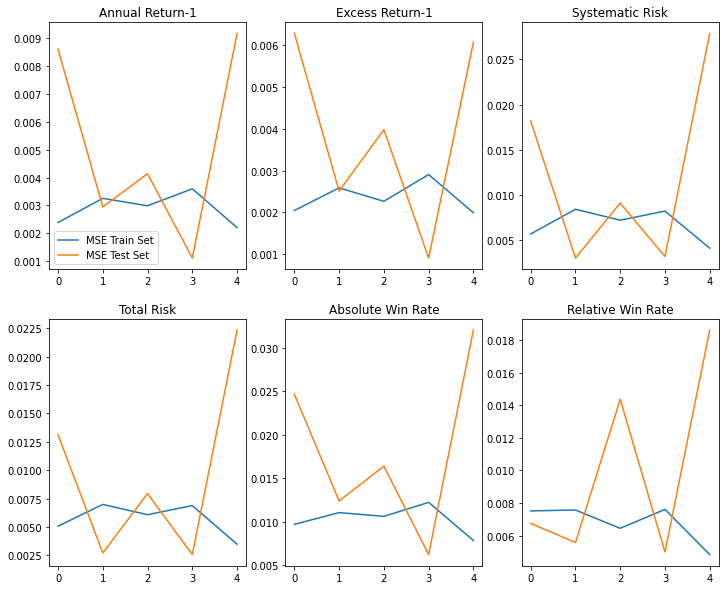

In [ ]:
figure,axis=plt.subplots(2,3,figsize=(12,10))
axis[0,0].plot(train_loss_ar,label='MSE Train Set')
axis[0,0].plot(test_loss_ar,label='MSE Test Set')
axis[0,0].set_title('Annual Return-1')
axis[0,0].legend()

axis[0,1].plot(train_loss_er)
axis[0,1].plot(test_loss_er)
axis[0,1].set_title('Excess Return-1')
  
axis[0,2].plot(train_loss_sr)
axis[0,2].plot(test_loss_sr)
axis[0,2].set_title('Systematic Risk')

axis[1,0].plot(train_loss_tr)
axis[1,0].plot(test_loss_tr)
axis[1,0].set_title('Total Risk')

axis[1,1].plot(train_loss_awr)
axis[1,1].plot(test_loss_awr)
axis[1,1].set_title('Absolute Win Rate')

axis[1,2].plot(train_loss_rwr)
axis[1,2].plot(test_loss_rwr)
axis[1,2].set_title('Relative Win Rate')

## Period 4
In this dataset I have used K fold cross validation and tested it by training and testing the dataset accordingly fold by fold.

### Dataset Description

In [ ]:
dataset_period4 = pd.read_excel("/content/drive/MyDrive/stock.xlsx",sheet_name=0)
dataset_period4.drop(dataset_period4.columns[[7,8,9,10,11,12]],axis=1,inplace=True)
dataset_period4.head()

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.488229,0.609445,0.780756,0.800000,0.68,0.333333
1,2,0.0,1.0,0.0,0.0,0.0,0.0,0.505279,0.508169,0.443776,0.414220,0.56,0.666667
2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.728484,0.800000,0.776397,0.755594,0.56,0.466667
3,4,0.0,0.0,0.0,1.0,0.0,0.0,0.384640,0.425836,0.529253,0.529196,0.56,0.266667
4,5,0.0,0.0,0.0,0.0,1.0,0.0,0.498046,0.479146,0.354852,0.319743,0.80,0.733333


In [ ]:
dataset_period4.fillna(method ='ffill', inplace = True)
x=dataset_period4.iloc[:,1:7]
y=dataset_period4.iloc[:,7:13]
dataset_4 = dataset_period3.drop(['Annual Return.1', 'Excess Return.1', 'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'], axis = 1)
dataset_4

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
0,1,1.000,0.000,0.000,0.000,0.000,0.000
1,2,0.000,1.000,0.000,0.000,0.000,0.000
2,3,0.000,0.000,1.000,0.000,0.000,0.000
3,4,0.000,0.000,0.000,1.000,0.000,0.000
4,5,0.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200
59,60,0.200,0.200,0.000,0.200,0.200,0.200
60,61,0.200,0.000,0.200,0.200,0.200,0.200
61,62,0.000,0.200,0.200,0.200,0.200,0.200


In [ ]:
# input with 6 features
x = np.array(dataset_3)
# min max scalling the dataset
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

### Annual Return

In [ ]:
y = np.array(dataset_period4['Annual Return.1']) 
# splitting data into training and testing datasets
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_ar=[]
test_loss_ar=[]
y_predict=[]
ans1=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  ans1.append(clf)
  y_predict_test = clf.predict(x_test_set[i])
  y_predict.append(y_predict_test)
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_ar.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_ar.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_annual_return= mean(train_mse)
Test_MSE_annual_return= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)
# plt.plot(y_predict)
# plt.plot(x_test_set)
# plt.show()

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002650497342047039+-0.00041121454439989644

Tesing Mean Squared Error : 0.004519815154026295+-0.0025432136724191238

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Excess Return

In [ ]:
y = np.array(dataset_period4['Excess Return.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_er=[]
test_loss_er=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_er.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_er.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_excess_return= mean(train_mse)
Test_MSE_excess_return= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002650497342047039+-0.00024118362664042047

Tesing Mean Squared Error : 0.004519815154026295+-0.001688417853623062

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Systematic Risk

In [ ]:
y = np.array(dataset_period4['Systematic Risk.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_sr=[]
test_loss_sr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_sr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_sr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_systematic_risk= mean(train_mse)
Test_MSE_systematic_risk= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002650497342047039+-0.00020264473023333727

Tesing Mean Squared Error : 0.004519815154026295+-0.0011009777848837645

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Total Risk

In [ ]:
y = np.array(dataset_period4['Total Risk.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_tr=[]
test_loss_tr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_tr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_tr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_total_risk= mean(train_mse)
Test_MSE_total_risk= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002650497342047039+-0.00018595501486400187

Tesing Mean Squared Error : 0.004519815154026295+-0.001184363744094308

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Absolute Win Rate

In [ ]:
y = np.array(dataset_period4['Abs. Win Rate.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_awr=[]
test_loss_awr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_awr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_awr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_abs_wr= mean(train_mse)
Test_MSE_abs_wr= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")


*************************************************************************
Training Mean Squared Error : 0.002650497342047039+-0.001390213135733363

Tesing Mean Squared Error : 0.004519815154026295+-0.008682533514285636

*************************************************************************


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


### Relative Win Rate

In [ ]:
y = np.array(dataset_period4['Rel. Win Rate.1'])
x_train_set, x_test_set, all_y_train, all_y_test = kfoldvalidation(x, y)
train_mse=[]
test_mse=[]
train_loss_rwr=[]
test_loss_rwr=[]
for i in range(0, 5):
  clf = LinearRegression()
  clf.fit(x_train_set[i], all_y_train[i])
  y_predict_test = clf.predict(x_test_set[i])
  y_predict_train = clf.predict(x_train_set[i])
  train_loss_rwr.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_loss_rwr.append(mean_squared_error(all_y_test[i], y_predict_test))
  train_mse.append(mean_squared_error(all_y_train[i], y_predict_train))
  test_mse.append(mean_squared_error(all_y_test[i], y_predict_test))

Train_MSE_rel_wr= mean(train_mse)
Test_MSE_rel_wr= mean(test_mse)

tr=statistics.pstdev(train_mse)
ts=statistics.pstdev(test_mse)

print()
print("*************************************************************************")
print("Training Mean Squared Error : "+str(Train_MSE_annual_return)+"+-"+str(tr))
print()
print("Tesing Mean Squared Error : "+str(Test_MSE_annual_return)+"+-"+str(ts))
print()
print("*************************************************************************")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



*************************************************************************
Training Mean Squared Error : 0.002650497342047039+-0.0004780244541757571

Tesing Mean Squared Error : 0.004519815154026295+-0.0021415782295047974

*************************************************************************


### Graphs Between MSE of Training and Test Dataset

Text(0.5, 1.0, 'Relative Win Rate')

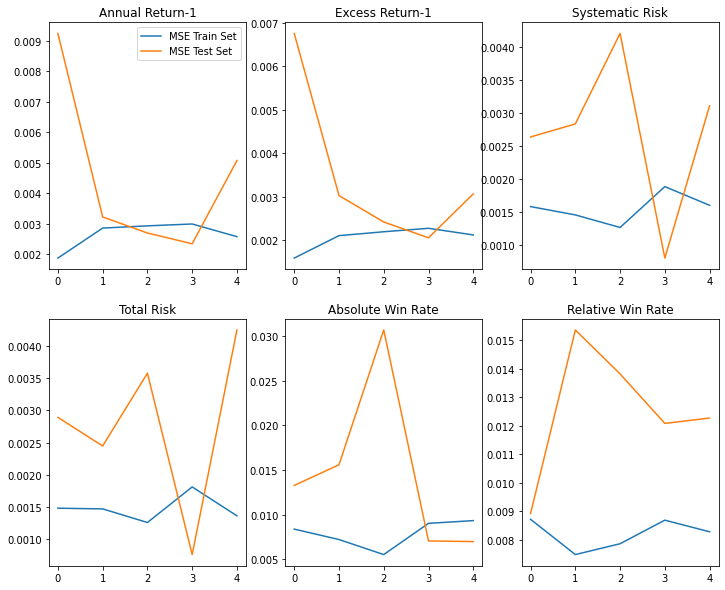

In [ ]:
figure,axis=plt.subplots(2,3,figsize=(12,10))
axis[0,0].plot(train_loss_ar,label='MSE Train Set')
axis[0,0].plot(test_loss_ar,label='MSE Test Set')
axis[0,0].set_title('Annual Return-1')
axis[0,0].legend()

axis[0,1].plot(train_loss_er)
axis[0,1].plot(test_loss_er)
axis[0,1].set_title('Excess Return-1')
  
axis[0,2].plot(train_loss_sr)
axis[0,2].plot(test_loss_sr)
axis[0,2].set_title('Systematic Risk')

axis[1,0].plot(train_loss_tr)
axis[1,0].plot(test_loss_tr)
axis[1,0].set_title('Total Risk')

axis[1,1].plot(train_loss_awr)
axis[1,1].plot(test_loss_awr)
axis[1,1].set_title('Absolute Win Rate')

axis[1,2].plot(train_loss_rwr)
axis[1,2].plot(test_loss_rwr)
axis[1,2].set_title('Relative Win Rate')